#### Dreem Challenge

# Cleaning the dataset and Model training 

In [2]:
%run tool_factory
setup_environment()

from imports import *
from features import *

Setup environment... done!


In [3]:
x_train = pd.read_csv('../datasets/x_train_2812.csv')
x_test = pd.read_csv('../datasets/x_test_2812.csv')

In [4]:
train_labels = pd.read_csv('../dreem-sleep-stages-2020/y_train.csv')

In [5]:
print('The training set consists of {} instances with {} different features.'.format(x_train.shape[0], x_train.shape[1]))
print('The test set consists of {} instances with {} different features.'.format(x_test.shape[0], x_test.shape[1]))

The training set consists of 24688 instances with 170 different features.
The test set consists of 24980 instances with 170 different features.


In [6]:
x_train.head()

,eeg_1_abs_mean,eeg_1_abs_median,eeg_1_std,eeg_1_abs_min,eeg_1_abs_max,eeg_1_fd_petrosian,eeg_1_app_entropy,eeg_1_higuchi_fd,eeg_1_max_freq,eeg_1_max_spectrum,eeg_1_sum_spectrum,eeg_1_sum_delta,eeg_1_sum_theta,eeg_1_sum_alpha,eeg_1_sum_beta,eeg_2_abs_mean,eeg_2_abs_median,eeg_2_std,eeg_2_abs_min,eeg_2_abs_max,eeg_2_fd_petrosian,eeg_2_app_entropy,eeg_2_higuchi_fd,eeg_2_max_freq,eeg_2_max_spectrum,eeg_2_sum_spectrum,eeg_2_sum_delta,eeg_2_sum_theta,eeg_2_sum_alpha,eeg_2_sum_beta,eeg_3_abs_mean,eeg_3_abs_median,eeg_3_std,eeg_3_abs_min,eeg_3_abs_max,eeg_3_fd_petrosian,eeg_3_app_entropy,eeg_3_higuchi_fd,eeg_3_max_freq,eeg_3_max_spectrum,eeg_3_sum_spectrum,eeg_3_sum_delta,eeg_3_sum_theta,eeg_3_sum_alpha,eeg_3_sum_beta,eeg_4_abs_mean,eeg_4_abs_median,eeg_4_std,eeg_4_abs_min,eeg_4_abs_max,eeg_4_fd_petrosian,eeg_4_app_entropy,eeg_4_higuchi_fd,eeg_4_max_freq,eeg_4_max_spectrum,eeg_4_sum_spectrum,eeg_4_sum_delta,eeg_4_sum_theta,eeg_4_sum_alpha,eeg_4_sum_beta,eeg_5_abs_mean,eeg_5_abs_median,eeg_5_std,eeg_5_abs_min,eeg_5_abs_max,eeg_5_fd_petrosian,eeg_5_app_entropy,eeg_5_higuchi_fd,eeg_5_max_freq,eeg_5_max_spectrum,eeg_5_sum_spectrum,eeg_5_sum_delta,eeg_5_sum_theta,eeg_5_sum_alpha,eeg_5_sum_beta,eeg_6_abs_mean,eeg_6_abs_median,eeg_6_std,eeg_6_abs_min,eeg_6_abs_max,eeg_6_fd_petrosian,eeg_6_app_entropy,eeg_6_higuchi_fd,eeg_6_max_freq,eeg_6_max_spectrum,eeg_6_sum_spectrum,eeg_6_sum_delta,eeg_6_sum_theta,eeg_6_sum_alpha,eeg_6_sum_beta,eeg_7_abs_mean,eeg_7_abs_median,eeg_7_std,eeg_7_abs_min,eeg_7_abs_max,eeg_7_fd_petrosian,eeg_7_app_entropy,eeg_7_higuchi_fd,eeg_7_max_freq,eeg_7_max_spectrum,eeg_7_sum_spectrum,eeg_7_sum_delta,eeg_7_sum_theta,eeg_7_sum_alpha,eeg_7_sum_beta,pulse_abs_mean,pulse_abs_median,pulse_std,pulse_abs_min,pulse_abs_max,pulse_fd_petrosian,pulse_app_entropy,pulse_higuchi_fd,pulse_max_freq,pulse_max_spectrum,pulse_sum_spectrum,x_abs_mean,x_abs_median,x_std,x_abs_min,x_abs_max,x_fd_petrosian,x_app_entropy,x_higuchi_fd,x_max_freq,x_max_spectrum,x_sum_spectrum,y_abs_mean,y_abs_median,y_std,y_abs_min,y_abs_max,y_fd_petrosian,y_app_entropy,y_higuchi_fd,y_max_freq,y_max_spectrum,y_sum_spectrum,z_abs_mean,z_abs_median,z_std,z_abs_min,z_abs_max,z_fd_petrosian,z_app_entropy,z_higuchi_fd,z_max_freq,z_max_spectrum,z_sum_spectrum,diff_eeg_1_2,diff_eeg_1_3,diff_eeg_1_4,diff_eeg_1_5,diff_eeg_1_6,diff_eeg_1_7,diff_eeg_2_3,diff_eeg_2_4,diff_eeg_2_5,diff_eeg_2_6,diff_eeg_2_7,diff_eeg_3_4,diff_eeg_3_5,diff_eeg_3_6,diff_eeg_3_7,diff_eeg_4_5,diff_eeg_4_6,diff_eeg_4_7,diff_eeg_5_6,diff_eeg_5_7,diff_eeg_6_7
0,1.432455,2.341661,169305.421875,2.379453e+06,5.310244e+05,1.021206,0.011610,1.289816,0.400000,3.276084e+10,8.599298e+11,4.989240e+11,4.051503e+10,1.342091e+10,1.117625e+10,4.144058,4.805282,50643.941406,714449.312500,1.556080e+05,1.014966,0.013708,1.289043,0.433333,2.867728e+09,7.694426e+10,4.483960e+10,3.652324e+09,1.209686e+09,1.006956e+09,3.688038,4.533875,48046.421875,1.474910e+05,677935.687500,1.015774,0.013660,1.289559,0.433333,2.579941e+09,6.925377e+10,4.036852e+10,3.288629e+09,1.089263e+09,906782976.0,5.865755,12.464251,119521.507812,3.781040e+05,1.677005e+06,1.013918,0.011278,1.287260,0.400000,1.667061e+10,4.285618e+11,2.481729e+11,2.012583e+10,6.667146e+09,5.552953e+09,0.745618,2.955460,1744.949341,24512.250000,5442.656250,1.020355,0.015409,1.331191,0.400000,3.571580e+06,91345440.0,52822676.0,4295542.000,1.421974e+06,1.181761e+06,0.456145,2.908623,2598.026855,36513.625000,8121.781250,1.019599,0.014191,1.317178,0.400000,7763275.0,202492304.0,117418152.0,9539004.00,3.157190e+06,2.624072e+06,2.177756,0.177528,167560.750000,5.255950e+05,2.354940e+06,1.022962,0.011610,1.289807,0.400000,3.208028e+10,8.422984e+11,4.887117e+11,3.968538e+10,1.314612e+10,1.094764e+10,7537.374023,12.306240,449755.87500,3239698.250,1935694.625,1.008288,0.133832,1.676375,1.1,3.847899e+11,6.068410e+12,0.350529,0.343190,0.020383,0.275146,0.404453,1.027353,0.292106,1.452881,0.033333,0.004876,0.012464,0.092477,0.117236,0.050561,0.070726,0.154137,1.022867,0.221976,1.22

## Feature space exploration

First step is to scale the features

In [7]:
scaler = preprocessing.StandardScaler()

In [35]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

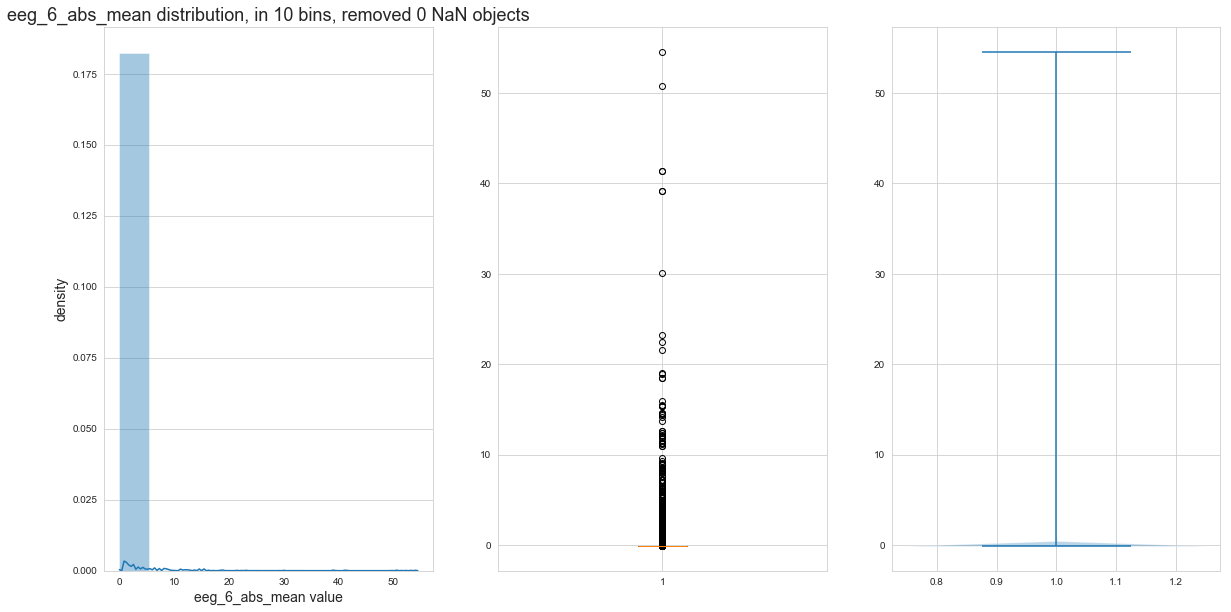

In [9]:
plot_continous_distribution(data=x_train_scaled, col='eeg_6_abs_mean', n_x=10)

Overall, the 'basic features' present an unevenly distribution across samples.

## Removing obvious outliers

In [107]:
eegs = ['eeg_{}'.format(i) for i in range(1,8)]
x_train_clean = x_train_scaled
for eeg in  eegs:
    x_train_clean = x_train_clean.drop(x_train_clean[abs(x_train_clean[eeg + '_abs_mean']) > 4].index, inplace=False)
train_labels_clean = train_labels['sleep_stage'][x_train_clean.index.tolist()]

In [108]:
x_train_clean.shape

(24437, 170)

In [109]:
print('{} instances were removed.'.format(x_train_scaled.shape[0] - x_train_clean.shape[0]))

251 instances were removed.


In [111]:
x_train_clean.head()

,eeg_1_abs_mean,eeg_1_abs_median,eeg_1_std,eeg_1_abs_min,eeg_1_abs_max,eeg_1_fd_petrosian,eeg_1_app_entropy,eeg_1_higuchi_fd,eeg_1_max_freq,eeg_1_max_spectrum,eeg_1_sum_spectrum,eeg_1_sum_delta,eeg_1_sum_theta,eeg_1_sum_alpha,eeg_1_sum_beta,eeg_2_abs_mean,eeg_2_abs_median,eeg_2_std,eeg_2_abs_min,eeg_2_abs_max,eeg_2_fd_petrosian,eeg_2_app_entropy,eeg_2_higuchi_fd,eeg_2_max_freq,eeg_2_max_spectrum,eeg_2_sum_spectrum,eeg_2_sum_delta,eeg_2_sum_theta,eeg_2_sum_alpha,eeg_2_sum_beta,eeg_3_abs_mean,eeg_3_abs_median,eeg_3_std,eeg_3_abs_min,eeg_3_abs_max,eeg_3_fd_petrosian,eeg_3_app_entropy,eeg_3_higuchi_fd,eeg_3_max_freq,eeg_3_max_spectrum,eeg_3_sum_spectrum,eeg_3_sum_delta,eeg_3_sum_theta,eeg_3_sum_alpha,eeg_3_sum_beta,eeg_4_abs_mean,eeg_4_abs_median,eeg_4_std,eeg_4_abs_min,eeg_4_abs_max,eeg_4_fd_petrosian,eeg_4_app_entropy,eeg_4_higuchi_fd,eeg_4_max_freq,eeg_4_max_spectrum,eeg_4_sum_spectrum,eeg_4_sum_delta,eeg_4_sum_theta,eeg_4_sum_alpha,eeg_4_sum_beta,eeg_5_abs_mean,eeg_5_abs_median,eeg_5_std,eeg_5_abs_min,eeg_5_abs_max,eeg_5_fd_petrosian,eeg_5_app_entropy,eeg_5_higuchi_fd,eeg_5_max_freq,eeg_5_max_spectrum,eeg_5_sum_spectrum,eeg_5_sum_delta,eeg_5_sum_theta,eeg_5_sum_alpha,eeg_5_sum_beta,eeg_6_abs_mean,eeg_6_abs_median,eeg_6_std,eeg_6_abs_min,eeg_6_abs_max,eeg_6_fd_petrosian,eeg_6_app_entropy,eeg_6_higuchi_fd,eeg_6_max_freq,eeg_6_max_spectrum,eeg_6_sum_spectrum,eeg_6_sum_delta,eeg_6_sum_theta,eeg_6_sum_alpha,eeg_6_sum_beta,eeg_7_abs_mean,eeg_7_abs_median,eeg_7_std,eeg_7_abs_min,eeg_7_abs_max,eeg_7_fd_petrosian,eeg_7_app_entropy,eeg_7_higuchi_fd,eeg_7_max_freq,eeg_7_max_spectrum,eeg_7_sum_spectrum,eeg_7_sum_delta,eeg_7_sum_theta,eeg_7_sum_alpha,eeg_7_sum_beta,pulse_abs_mean,pulse_abs_median,pulse_std,pulse_abs_min,pulse_abs_max,pulse_fd_petrosian,pulse_app_entropy,pulse_higuchi_fd,pulse_max_freq,pulse_max_spectrum,pulse_sum_spectrum,x_abs_mean,x_abs_median,x_std,x_abs_min,x_abs_max,x_fd_petrosian,x_app_entropy,x_higuchi_fd,x_max_freq,x_max_spectrum,x_sum_spectrum,y_abs_mean,y_abs_median,y_std,y_abs_min,y_abs_max,y_fd_petrosian,y_app_entropy,y_higuchi_fd,y_max_freq,y_max_spectrum,y_sum_spectrum,z_abs_mean,z_abs_median,z_std,z_abs_min,z_abs_max,z_fd_petrosian,z_app_entropy,z_higuchi_fd,z_max_freq,z_max_spectrum,z_sum_spectrum,diff_eeg_1_2,diff_eeg_1_3,diff_eeg_1_4,diff_eeg_1_5,diff_eeg_1_6,diff_eeg_1_7,diff_eeg_2_3,diff_eeg_2_4,diff_eeg_2_5,diff_eeg_2_6,diff_eeg_2_7,diff_eeg_3_4,diff_eeg_3_5,diff_eeg_3_6,diff_eeg_3_7,diff_eeg_4_5,diff_eeg_4_6,diff_eeg_4_7,diff_eeg_5_6,diff_eeg_5_7,diff_eeg_6_7
0,-0.056080,-0.033088,9.674668,23.361912,4.393360,0.443798,-2.163977,-1.169345,-0.263377,1.644528,4.529743,4.206880,4.637655,8.253315,18.636397,-0.062516,-0.030132,2.501905,6.844359,1.094576,-1.211257,-2.038692,-1.058750,-0.295299,0.087355,0.238018,0.175966,0.307684,0.480002,1.508087,-0.081441,-0.064023,2.752322,1.214270,6.241870,-1.294725,-1.859521,-0.956054,-0.097398,0.136629,0.561873,0.579140,0.959664,1.386274,3.250528,-0.066742,-0.032312,6.746942,3.489954,15.096737,-1.783219,-1.935836,-1.008216,-0.150994,0.880803,4.157246,4.297900,7.232844,10.138636,20.774048,-0.069675,-0.062093,0.002746,0.151284,-0.053587,0.063581,-2.164633,-0.952791,-0.272405,-0.048824,-0.043198,-0.040071,-0.022849,-0.023937,-0.023229,-0.071351,-0.064547,0.042736,0.275130,-0.034055,0.144029,-2.123515,-0.972945,-0.366135,-0.041795,-0.033416,-0.027153,-0.022364,-0.020376,-0.021078,-0.072414,-0.063435,11.071186,5.594336,24.080951,-0.277935,-1.802598,-1.130837,-0.053736,1.996986,9.756632,11.187653,22.965792,37.200180,55.492269,6.187057,-0.703648,7.506877,7.688868,6.149479,-1.670564,-2.574156,-0.960224,0.673519,9.666728,9.062940,-0.272171,-0.300766,0.063596,-0.544423,-0.108063,-2.478980,-1.918731,-1.444041,-0.367893,-0.117273,-0.136732,-1.833927,-1.769461,0.519642,-1.928790,-1.676927,-3.912179,-2.275401,-2.789248,-0.417552,-0.068511,-0.067049,2.592719,2.586032,-0.105016,2.646200,2.451680,-1.005200,-1.881106,-1.324409,-0.564666,-0.103470,-0.125356,4.830744,9.144221,9.812561,11.04

## Feature's correlation, importance and distribution VS sleep stages

In [100]:
x_train_clean_ = x_train_clean
x_train_clean_['sleep_stage'] = train_labels['sleep_stage']

In [27]:
corr = x_train_clean_.corr()

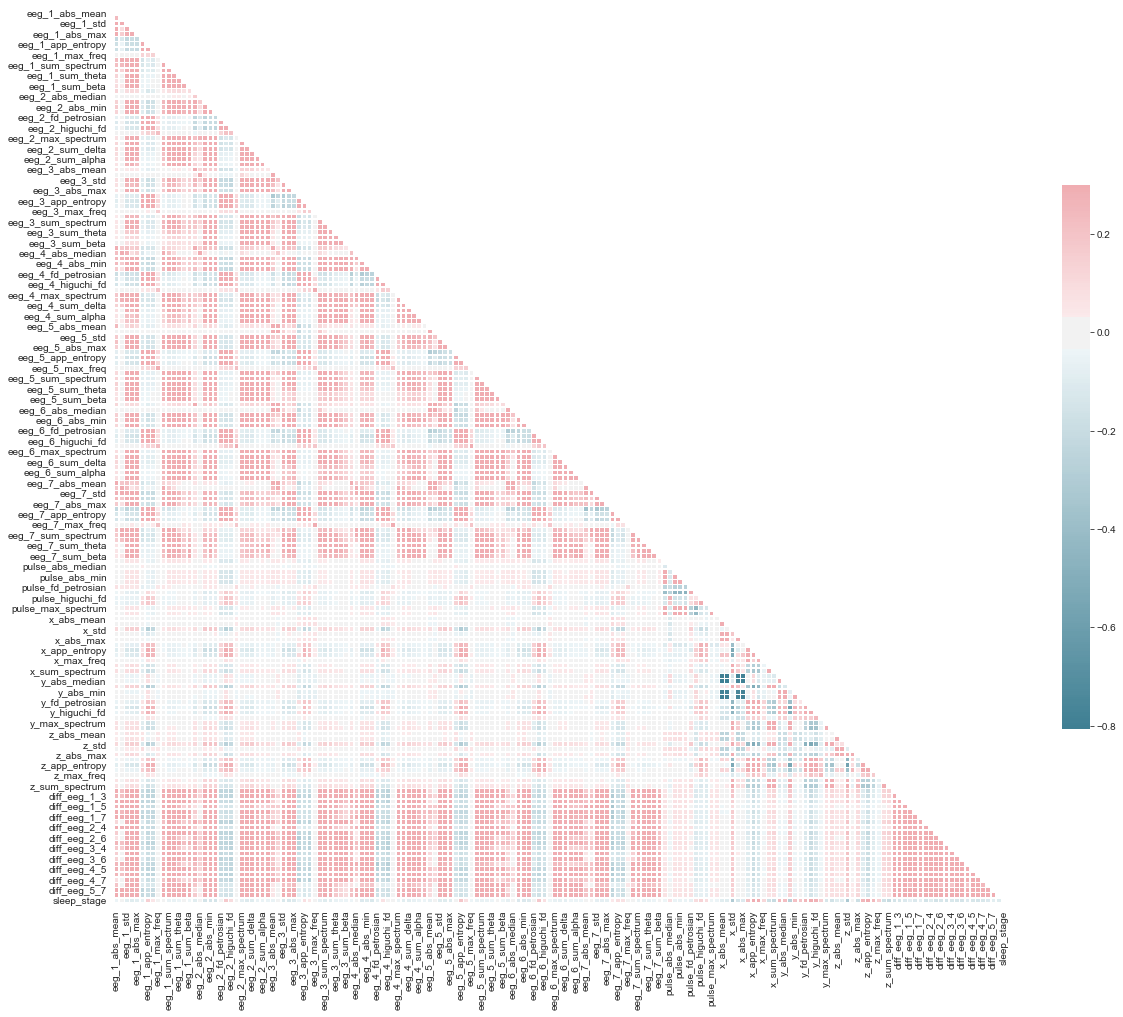

In [28]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

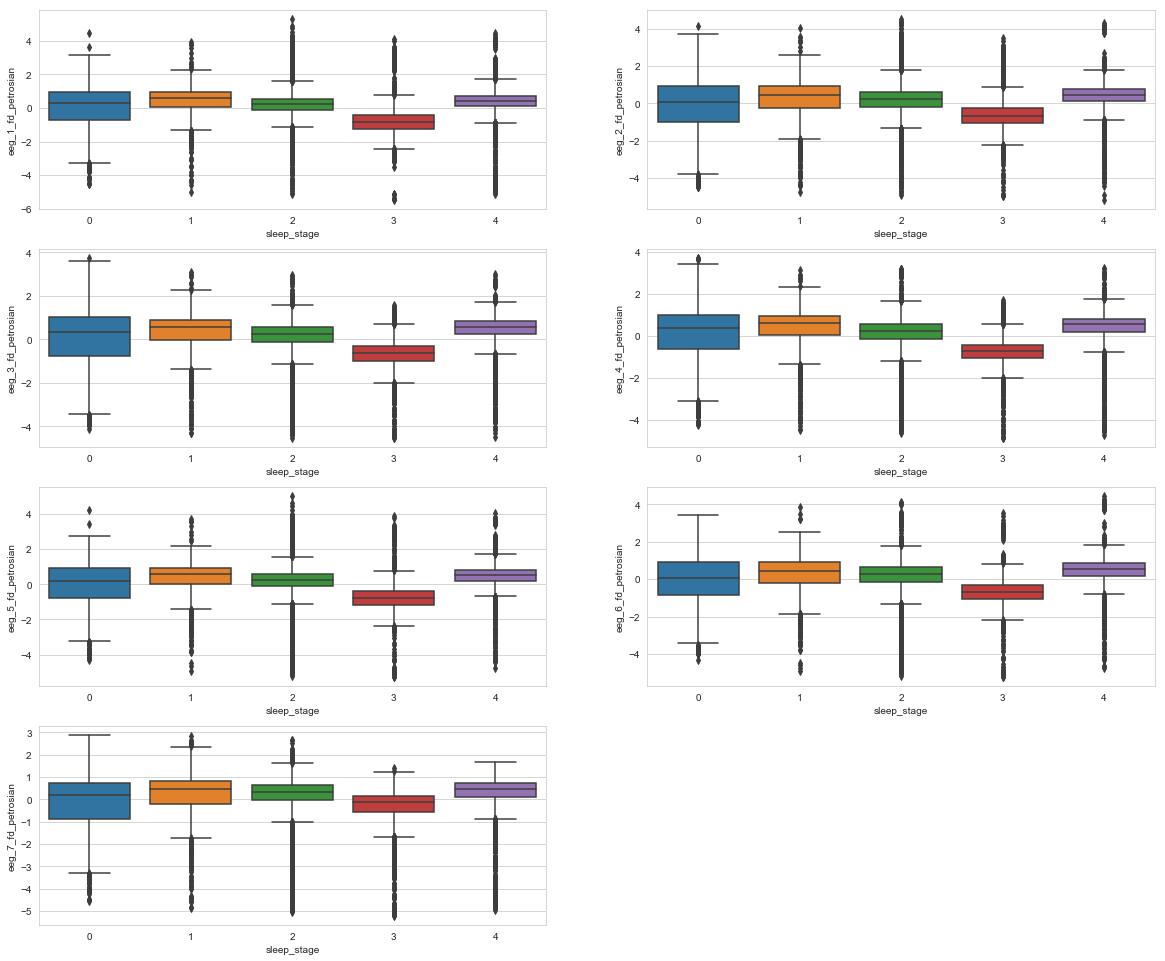

In [29]:
fig = plt.figure(figsize=(20, 30))
for i in range(1,8):
    plt.subplot(7, 2, i)
    sns.boxplot(x='sleep_stage', y='eeg_{}_fd_petrosian'.format(i), data=x_train_clean_)

## Model Training

In [101]:
clf = RandomForestClassifier(random_state=123)

In [102]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [115]:
# run grid search
#random_search = GridSearchCV(clf, 
#                             param_grid=param_dist,
#                             cv=5,
#                             iid=False,
#                             scoring='f1_weighted')

# randomized grid search 
random_search = RandomizedSearchCV(estimator = clf,
                   param_distributions = random_grid,
                   n_iter = 100,
                   cv = 5,
                   verbose=2,
                   random_state=123,
                   n_jobs = -1)

In [116]:
random_search.fit(x_train_clean, train_labels_clean)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 67.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 311.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 596.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 838.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [118]:
def report(results, n_top=3):
    """
    Report the Grid Search results
    """
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [119]:
report(random_search.cv_results_, n_top=3)

Model with rank: 1
Mean validation score: 0.671 (std: 0.022)
Parameters: {'n_estimators': 1366, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.671 (std: 0.022)
Parameters: {'n_estimators': 1577, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.671 (std: 0.023)
Parameters: {'n_estimators': 1366, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}



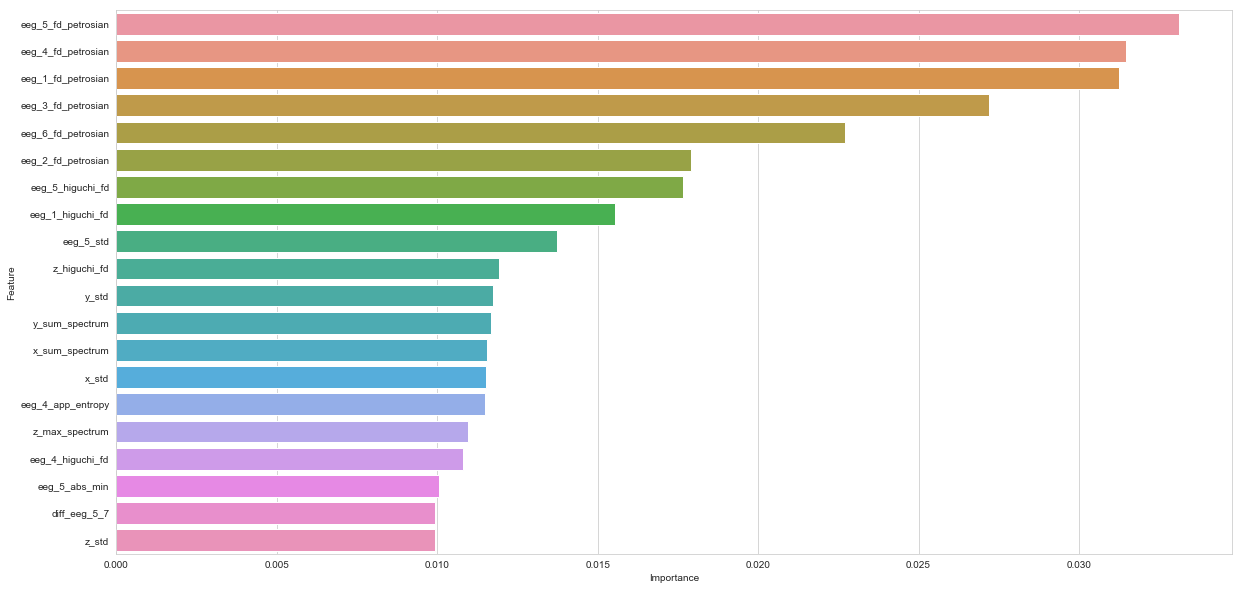

In [120]:
top_n = 20
features_importances = pd.DataFrame({'Feature':x_train_scaled.columns, 'Importance':random_search.best_estimator_.feature_importances_})
features_importances.sort_values('Importance', ascending=False, inplace=True)
fig = plt.figure(figsize=(20,10))
sns.barplot(x='Importance', y='Feature', data=features_importances[0:20])

In [121]:
model = random_search.best_estimator_

In [150]:
train_predict = model.predict(x_train_scaled)

In [153]:
metrics.f1_score(y_true=train_labels['sleep_stage'], 
                 y_pred=train_predict,
                 average='weighted')

1.0

## Making predictions on the test set and export

In [122]:
results = random_search.best_estimator_.predict(x_test_scaled)
results_df = pd.DataFrame({'sleep_stage' : results})
results_df['index'] = results_df.index + 24688 # matching index with online test instance indexes
results_df = results_df[['index', 'sleep_stage']]

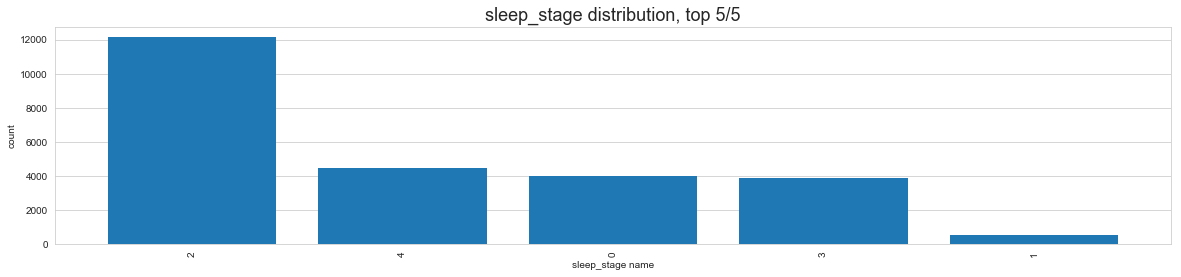

In [123]:
plot_categorical_distribution(results_df, col='sleep_stage', n_x=5)

In [124]:
results_df.to_csv('../predictions/3012_predictions.csv', header=True, index=False)

In [127]:
! head '../predictions/3012_predictions.csv'

index,sleep_stage
24688,0
24689,0
24690,0
24691,0
24692,0
24693,0
24694,0
24695,0
24696,0
